In [3]:
import matplotlib.pyplot as plt
import time
import numpy as np
from importlib import reload

In [106]:
# Read in the training data
train_data = np.genfromtxt('Data/mnist_train.csv', delimiter=',')
# The first row is the headers so we drop it
train_data = train_data[1:]

1.0

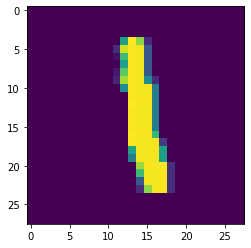

In [95]:
image1 = np.reshape(train_data[6,1:],(28,28))
label = train_data[6,0]
plt.imshow(image1)
label

7.0

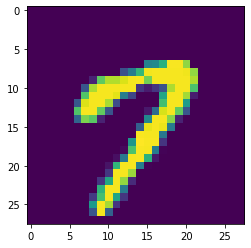

In [96]:
image7 = np.reshape(train_data[15,1:],(28,28))
label = train_data[15,0]
plt.imshow(image7)
label

In [17]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 28  # canvas width
height = 28 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.jpg"
    output_image.save(filename)
    draw1 = np.asarray(output_image)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
imageTest = PIL.Image.fromarray(np.uint8(image1))
image = ImageTk.PhotoImage(imageTest)
canvas.create_image(1, 1, image= image, anchor = NW)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

In [84]:
drawImage1 = np.asarray(output_image)[:,:,0]
drawImage1 = np.reshape(drawImage1,(1,784))
randomCnt = np.count_nonzero(drawImage1==255)
randIdxLow = drawImage1.nonzero()[1]
randIdxHigh = np.where(drawImage1==0)[1]

newData1 = np.zeros((1000,784))
for i in range(0,1000):
    newData1[i,randIdxLow] = np.uint8(np.random.random(randomCnt)*50)
    newData1[i,randIdxHigh] = np.uint8(np.random.random(np.size(randIdxHigh,0))*35+220)
    
newData1 = np.insert(newData1,0,np.ones((1,1000)),axis=1)

In [97]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 28  # canvas width
height = 28 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.jpg"
    output_image.save(filename)
    draw1 = np.asarray(output_image)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
imageTest = PIL.Image.fromarray(np.uint8(image7))
image = ImageTk.PhotoImage(imageTest)
canvas.create_image(1, 1, image= image, anchor = NW)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

In [103]:
drawImage2 = np.asarray(output_image)[:,:,0]
drawImage2 = np.reshape(drawImage2,(1,784))
randomCnt = np.count_nonzero(drawImage2==255)
randIdxLow = drawImage2.nonzero()[1]
randIdxHigh = np.where(drawImage2==0)[1]

newData2 = np.zeros((1000,784))
for i in range(0,1000):
    newData2[i,randIdxLow] = np.uint8(np.random.random(randomCnt)*50)
    newData2[i,randIdxHigh] = np.uint8(np.random.random(np.size(randIdxHigh,0))*35+220)
    
newData2 = np.insert(newData2,0,np.ones((1,1000))*7,axis=1)

In [105]:
# Read in the testing data
test_data = np.genfromtxt('Data/mnist_test.csv', delimiter=',')
# The first row is the headers so we drop it
test_data = test_data[1:]

In [107]:
# Train 1 and 7 Classifer
digit_mask = (train_data[:, 0] == 1) | (train_data[:, 0] == 7)  # Filter Digits Down
filteredData = train_data[digit_mask, :]   
x_train = filteredData[:, 1:]    
y_train = filteredData[:, 0]

digit_mask = (test_data[:, 0] == 1) | (test_data[:, 0] == 7)  # Filter Digits Down    
filteredData = test_data[digit_mask, :]   
x_test = filteredData[:, 1:]    
y_test = filteredData[:, 0]

import MyClassifier_10 as cl
reload(cl)

Classify_1and7 = cl.MyClassifier(2, 784)
start_time = time.time()
Classify_1and7.train(0.6, x_train, y_train)
tottime = time.time() - start_time
print('Took {:.3f} seconds to train'.format(tottime))

Runing Classifier:  1 for  (1.0, 7.0)
Done  training, yay!...
Took 23.141 seconds to train


In [115]:
np.size(x_test,0)*(1-.9958)

9.08459999999996

Accuracy for average all test data sets is:  [99.45 99.24 98.86 97.52]


Text(0.5, 1.0, 'Single Classifier 1 and 7 Results')

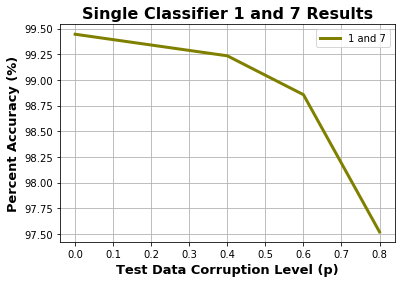

In [108]:
# Test 1 and 7 Classifer 10 times
all_accuracy = list()
for i in range(0,11):
    accuracy = list()
    results = Classify_1and7.classify(x_test)
    correct = results == y_test
    accuracy.append(np.sum(correct) / len(y_test) * 100)

    results = Classify_1and7.TestCorrupted(0.4,x_test)
    correct = results == y_test
    accuracy.append(np.sum(correct) / len(y_test) * 100)

    results = Classify_1and7.TestCorrupted(0.6,x_test)
    correct = results == y_test
    accuracy.append(np.sum(correct) / len(y_test) * 100)

    results = Classify_1and7.TestCorrupted(0.8,x_test)
    correct = results == y_test
    accuracy.append(np.sum(correct) / len(y_test) * 100)
    
    all_accuracy.append(accuracy)

avg_accuracy = np.nanmean(all_accuracy,axis=0)

print('Accuracy for average all test data sets is: ', np.around(avg_accuracy,2))

x = [0, 0.4, 0.6, 0.8]

# Plot Results
plt.plot(x,avg_accuracy, color='olive', linewidth=3, label="1 and 7")
plt.legend()
plt.grid()

plt.xlabel('Test Data Corruption Level (p)',fontsize = 13,fontweight='bold')
plt.ylabel('Percent Accuracy (%)',fontsize = 13,fontweight='bold')
plt.title('Single Classifier 1 and 7 Results',fontsize = 16,fontweight='bold')


In [109]:
# Train 1 and 7 Classifer With Sim Data!!
train_data = np.concatenate((train_data,newData1,newData2),axis=0)
digit_mask = (train_data[:, 0] == 1) | (train_data[:, 0] == 7)  # Filter Digits Down
filteredData = train_data[digit_mask, :]   
x_train = filteredData[:, 1:]    
y_train = filteredData[:, 0]

digit_mask = (test_data[:, 0] == 1) | (test_data[:, 0] == 7)  # Filter Digits Down    
filteredData = test_data[digit_mask, :]   
x_test = filteredData[:, 1:]    
y_test = filteredData[:, 0]

import MyClassifier_10 as cl
reload(cl)

Classify_1and7 = cl.MyClassifier(2, 784)
start_time = time.time()
Classify_1and7.train(0.6, x_train, y_train)
tottime = time.time() - start_time
print('Took {:.3f} seconds to train'.format(tottime))

Runing Classifier:  1 for  (1.0, 7.0)
Done  training, yay!...
Took 63.176 seconds to train


Accuracy for average all test data sets is:  [99.58 99.39 99.1  97.47]


Text(0.5, 1.0, 'Single Classifier 1 and 7 Results with Sim 1 Data')

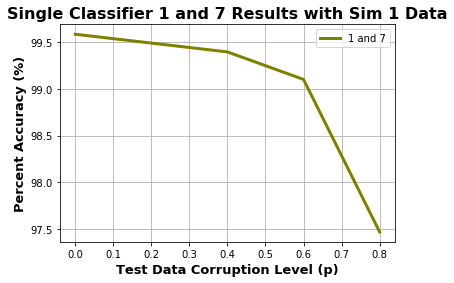

In [110]:
# Test 1 and 7 Classifer 10 times
all_accuracy = list()
for i in range(0,11):
    accuracy = list()
    results = Classify_1and7.classify(x_test)
    correct = results == y_test
    accuracy.append(np.sum(correct) / len(y_test) * 100)

    results = Classify_1and7.TestCorrupted(0.4,x_test)
    correct = results == y_test
    accuracy.append(np.sum(correct) / len(y_test) * 100)

    results = Classify_1and7.TestCorrupted(0.6,x_test)
    correct = results == y_test
    accuracy.append(np.sum(correct) / len(y_test) * 100)

    results = Classify_1and7.TestCorrupted(0.8,x_test)
    correct = results == y_test
    accuracy.append(np.sum(correct) / len(y_test) * 100)
    
    all_accuracy.append(accuracy)

avg_accuracy = np.nanmean(all_accuracy,axis=0)

print('Accuracy for average all test data sets is: ', np.around(avg_accuracy,2))

x = [0, 0.4, 0.6, 0.8]

# Plot Results
plt.plot(x,avg_accuracy, color='olive', linewidth=3, label="1 and 7")
plt.legend()
plt.grid()

plt.xlabel('Test Data Corruption Level (p)',fontsize = 13,fontweight='bold')
plt.ylabel('Percent Accuracy (%)',fontsize = 13,fontweight='bold')
plt.title('Single Classifier 1 and 7 Results with Sim 1 Data',fontsize = 16,fontweight='bold')

In [16]:
# Train 10 Classifier
reload(cl)
x_train = train_data[:,1:]
y_train = train_data[:,0]
x_test = test_data[:,1:]
y_test = test_data[:,0]

Classify_10 = cl.MyClassifier(10, 784)
start_time = time.time()
Classify_10.train(0.6, x_train, y_train)
tottime = time.time() - start_time
print('Took {:.3f} minutes to train'.format(tottime/60))

Runing Classifier:  1 for  (0.0, 1.0)
Runing Classifier:  2 for  (0.0, 2.0)
Runing Classifier:  3 for  (0.0, 3.0)
Runing Classifier:  4 for  (0.0, 4.0)
Runing Classifier:  5 for  (0.0, 5.0)
Runing Classifier:  6 for  (0.0, 6.0)
Runing Classifier:  7 for  (0.0, 7.0)
Runing Classifier:  8 for  (0.0, 8.0)
Runing Classifier:  9 for  (0.0, 9.0)
Runing Classifier:  10 for  (1.0, 2.0)
Runing Classifier:  11 for  (1.0, 3.0)
Runing Classifier:  12 for  (1.0, 4.0)
Runing Classifier:  13 for  (1.0, 5.0)
Runing Classifier:  14 for  (1.0, 6.0)
Runing Classifier:  15 for  (1.0, 7.0)
Runing Classifier:  16 for  (1.0, 8.0)
Runing Classifier:  17 for  (1.0, 9.0)
Runing Classifier:  18 for  (2.0, 3.0)
Runing Classifier:  19 for  (2.0, 4.0)
Runing Classifier:  20 for  (2.0, 5.0)
Runing Classifier:  21 for  (2.0, 6.0)
Runing Classifier:  22 for  (2.0, 7.0)
Runing Classifier:  23 for  (2.0, 8.0)
Runing Classifier:  24 for  (2.0, 9.0)
Runing Classifier:  25 for  (3.0, 4.0)
Runing Classifier:  26 for  (3.0, 

/Users/sunaybhat/.conda/envs/PythonPrograms/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


Runing Classifier:  43 for  (7.0, 8.0)
Runing Classifier:  44 for  (7.0, 9.0)
Runing Classifier:  45 for  (8.0, 9.0)
Done  training, yay!...
Took 1444.927 seconds to train


Accuracy for all test data sets is:  [92.9  91.52 87.96 78.46]


Text(0.5, 1.0, 'All 10 Classifier Results')

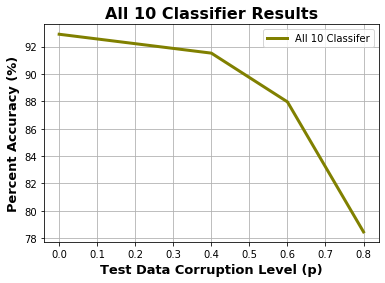

In [18]:
# Test All 10 Classifer
accuracy = list()
results = Classify_10.classify(x_test)
correct = results == y_test
accuracy.append(np.sum(correct) / len(y_test) * 100)

results = Classify_10.TestCorrupted(0.4,x_test)
correct = results == y_test
accuracy.append(np.sum(correct) / len(y_test) * 100)

results = Classify_10.TestCorrupted(0.6,x_test)
correct = results == y_test
accuracy.append(np.sum(correct) / len(y_test) * 100)

results = Classify_10.TestCorrupted(0.8,x_test)
correct = results == y_test
accuracy.append(np.sum(correct) / len(y_test) * 100)

print('Accuracy for all test data sets is: ', np.around(accuracy,2))

x = [0, 0.4, 0.6, 0.8]

# Plot Results
plt.plot(x,accuracy, color='olive', linewidth=3, label="All 10 Classifer")
plt.legend()
plt.grid()

plt.xlabel('Test Data Corruption Level (p)',fontsize = 13,fontweight='bold')
plt.ylabel('Percent Accuracy (%)',fontsize = 13,fontweight='bold')
plt.title('All 10 Classifier Results',fontsize = 16,fontweight='bold')

